SIMULACION

In [3]:
#Librerias
import math as mt
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
# Funciones del calculo de la posición de la j_ésima partícula
def ur_p(q0, j, r, n):
    return q0* mt.sin(j*r*mt.pi/(n+1))

def vr_p(v0, j, r, n):
    return v0* mt.sin(j*r*mt.pi/(n+1))

def wr(T, d, ms, r, n):
    return 2*mt.sqrt(T/(d*ms))*mt.sin(r*mt.pi/(2*n+2))

def qj (u_r, wr, v_r, j, r, n):
    return (u_r*mt.cos(wr*t) - v_r*mt.sin(wr*t))*mt.sin(j*r*mt.pi/(n+1))

In [5]:
# Inicializar arreglos
def init_p(N):
    for i in range(N):
        initial_pos[i] = rd.random() 
    return initial_pos

def init_v(N):
    for i in range(N):
        initial_vel[i] = rd.random()
    return initial_vel

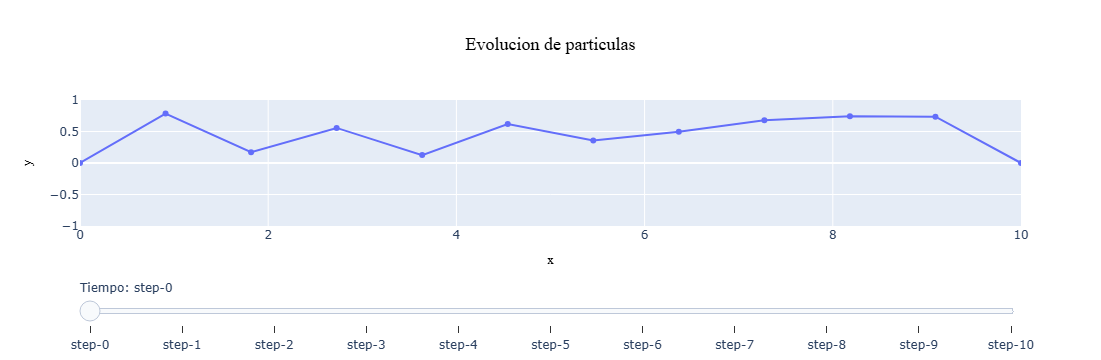

In [77]:
# Simulacion

n_particulas = 10

#Condiciones 
Tension = 5
masa = 1
Longitud_cuerda = 10 
dis = Longitud_cuerda / (n_particulas + 1)

initial_pos = np.zeros(n_particulas)
initial_vel = np.zeros(n_particulas)

# Elige una posición y velocidad incial  #caso de la clase con n_particulas = 3
#s = 1
#initial_pos[s] = 2
#initial_vel[s] = 0

# Condiciones iniciales aleatorias para todas las partículas
initial_pos = init_p(n_particulas)
initial_vel = init_v(n_particulas)

# Arreglo para determinar la posición de la k-ésima partícula
#j = 1
#init_pos = 10
#init_vel = 0

#posiciones en x
positions_x = np.zeros(n_particulas+2)
for i in range(1,n_particulas+2):
    positions_x[i] = dis*i


#Tiempo inicial y tiempo final con dt
tiempo = 0
tiempo_final = 10
iter = 10
dt = (tiempo_final - tiempo) / iter

# Comenzar a crear el grafico el gráfico
#y_lim = (-initial_pos[s]-0.2,initial_pos[s]+ 0.2)   #limite en y de la grafica (escala)

index_graph = 0


eq_line = np.zeros(n_particulas+2)

array_pos_tem = [[] for i in range(iter+1)]
array_tem = []
k=0

while(tiempo <= tiempo_final): 
    #posiciones en y
    positions_y = np.zeros(n_particulas+2)
    for j in range(1,n_particulas+1):
        pos_j1 = 0   # posicion auxiliar
        pos_j2 = 0
        for r in range(1,n_particulas+1):
            pos_j_1_1 = 0
            pos_j_1_2 = 0
            wr_val = wr(Tension,dis,masa,r,n_particulas)
            for j_1 in range(1,n_particulas+1):
                pos_j_1_1 = pos_j_1_1 + ur_p(initial_pos[j_1-1], j_1, r, n_particulas)
                pos_j_1_2 = pos_j_1_2 + vr_p(initial_vel[j_1-1], j_1, r, n_particulas)
            
            pos_j1 = pos_j1 + pos_j_1_1*mt.cos(wr_val*tiempo)*mt.sin(j*r*mt.pi/(n_particulas+1))
            pos_j2 = pos_j2 + (1/wr_val)*pos_j_1_2*mt.sin(wr_val*tiempo)*mt.sin(j*r*mt.pi/(n_particulas+1))   #termina sumatoria en j'
        
        positions_y[j] = (2/(n_particulas+1)) * (pos_j1 - pos_j2) #termina sumatoria en r para obtener j-ésima posición
        
    array_pos_tem[k] = positions_y
    array_tem.append(tiempo)
    
    #print(positions_y)
    #print(f'({k}, {tiempo})')
    tiempo += dt
    k+=1


#print(pos_j)
#print(positions_y)
#print(initial_pos)
#print(initial_vel)
#print(positions_x)
#print(positions_y)

# Mostrar el gráfico 

fig = go.Figure()

for j in range(n_particulas):
        fig.add_trace(go.Scatter(visible=False, mode="lines+markers", x=positions_x, y=array_pos_tem[j], name=f"Partícula {j + 1}"))

# Al ejecutarse por primera vez, muestra la función para la frecuencia que está en data[v]
fig.data[0].visible = True    ##--> Muestra la función para t = 0

    # Crear y añadir una barra deslizante
steps = []
for i, k in enumerate(array_tem):
    step = dict(method="update",args=[{"y": [array_pos_tem[i]]}, {"title": f"Tiempo: {k:.2f} s"}],) # Atributo de diseño
    # Primero se le dice que todas las funciones sean False
    steps.append(step)

sliders = [dict(active=0, currentvalue={"prefix": "Tiempo: "}, pad={"t": 50}, steps=steps)]

fig.update_layout(sliders=sliders, title=dict(text="Evolucion de particulas", font=dict(size=18, color="black", family="Times New Roman"), x=0.5), # Centrado horizontalmente
    xaxis_title=dict(text="x",font=dict(size=12, color="black", family="Times New Roman")),   
    yaxis_title=dict(text="y", font=dict(size=12, color="black", family="Times New Roman")), xaxis=dict(range=[0, Longitud_cuerda]),
    yaxis=dict(range=[-1, 1]))
fig.show()#"""




In [52]:

#Ejemplo en clase (Comparación)
a = 2
q1 = np.zeros(iter+1)
q2 = np.zeros(iter+1)
t = 0
i = 0
while(t <= tiempo_final):
    q1[i] = (a*mt.sqrt(2)/4)*(mt.cos(wr(Tension,dis,masa,1,n_particulas)*t)-mt.cos(wr(Tension,dis,masa,3,n_particulas)*t))
    q2[i] = (a/2)*(mt.cos(wr(Tension,dis,masa,1,n_particulas)*t)+mt.cos(wr(Tension,dis,masa,3,n_particulas)*t))
    i = i+1
    t = t + dt

print(q1)
print(q2)


[0.         0.01986698 0.07788648 0.16942432 0.28711631 0.42138176
 0.56109251 0.69435213 0.80933179 0.89510596 0.94243077]
[ 2.          1.96019956  1.84317169  1.65587952  1.4094145   1.11826242
  0.79934617  0.47091001  0.15132078 -0.14213313 -0.39436398]
